# Train Models

The central goal of machine learning is to train predictive models that can be used by applications. In Azure Machine Learning,  you can use scripts to train models leveraging common machine learning frameworks like Scikit-Learn, Tensorflow, PyTorch, SparkML, and others. You can run these training scripts as experiments in order to track metrics and outputs, which include the trained models.

## Read data from local file



In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('credit.csv')

In [17]:
df

,Sno,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [18]:
df.describe()

,Sno,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## Split data randomnly

In [19]:
import numpy as np

In [34]:
random_data = np.random.rand(len(df))

msk_train = random_data < 0.7
msk_val = (random_data >= 0.7) & (random_data < 0.85)
msk_test = random_data >= 0.85

train = df[msk_train]
val = df[msk_val]
test = df[msk_test] 

In [21]:
train.describe()

,Sno,Age,Job,Credit amount,Duration
count,701.000000,701.000000,701.000000,701.000000,701.000000
mean,496.679030,35.726106,1.905849,3330.459344,20.957204
std,288.238138,11.596269,0.656599,2837.975285,12.487864
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,241.000000,27.000000,2.000000,1364.000000,12.000000
50%,504.000000,33.000000,2.000000,2353.000000,18.000000
75%,745.000000,42.000000,2.000000,4151.000000,24.000000
max,999.000000,74.000000,3.000000,15945.000000,72.000000


In [22]:
val.describe()

,Sno,Age,Job,Credit amount,Duration
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,514.013793,34.896552,1.862069,3002.868966,20.186207
std,294.935633,10.733336,0.630484,2788.340830,10.721853
min,13.000000,19.000000,0.000000,339.000000,6.000000
25%,252.000000,26.000000,2.000000,1343.000000,12.000000
50%,514.000000,32.000000,2.000000,2132.000000,18.000000
75%,767.000000,40.000000,2.000000,3594.000000,24.000000
max,998.000000,67.000000,3.000000,14555.000000,60.000000


In [23]:
test.describe()

,Sno,Age,Job,Credit amount,Duration
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,498.675325,35.337662,1.935065,3254.480519,21.331169
std,287.131791,10.984374,0.663476,2788.257887,11.274388
min,18.000000,20.000000,0.000000,338.000000,6.000000
25%,266.250000,27.000000,2.000000,1391.500000,12.000000
50%,480.000000,33.500000,2.000000,2231.500000,18.000000
75%,743.750000,41.000000,2.000000,4231.500000,24.000000
max,996.000000,75.000000,3.000000,18424.000000,60.000000


## Train model

Drop `Sno` field which is high-cardinality.

In [35]:
train.drop("Sno", axis=1, inplace=True)
val.drop("Sno", axis=1, inplace=True)

C:\Users\madiepev\AppData\Local\Temp\ipykernel_24996\3365287191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop("Sno", axis=1, inplace=True)
C:\Users\madiepev\AppData\Local\Temp\ipykernel_24996\3365287191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val.drop("Sno", axis=1, inplace=True)


In [25]:
val

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
13,60,male,1,own,little,little,1199,24,car,bad
15,32,female,1,own,moderate,little,1282,24,radio/TV,bad
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,good
26,39,male,1,own,little,NaN,426,6,radio/TV,good
28,34,male,2,own,little,moderate,2415,7,radio/TV,good
...,...,...,...,...,...,...,...,...,...,...
985,25,female,2,rent,little,little,1433,15,furniture/equipment,good
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good


In [36]:
y_train = train['Risk']
X_train = train.drop('Risk', axis=1)

y_val = val['Risk']
X_val = val.drop('Risk', axis=1)

In [37]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float']).columns

In [39]:
categorical_features

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [40]:
numeric_features

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

Encode fields.

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [41]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    ('onehotencoder', OneHotEncoder(categories='auto', sparse=False))])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

feature_engineering_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ], remainder="drop")

Encode labels

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
encoded_y = le.fit_transform(y_train)

Create sklearn pipeline

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr_clf = Pipeline(steps=[('preprocessor', feature_engineering_pipeline),
                             ('classifier', LogisticRegression(solver="lbfgs"))])

Train the model

In [51]:
model = lr_clf.fit(X_train, y_train)

Capture metrics

In [48]:
train_acc = lr_clf.score(X_train, y_train)
val_acc = lr_clf.score(X_val, y_val)

In [49]:
train_acc

0.7396280400572246

In [50]:
val_acc

0.6883116883116883

## Evaluate model

Create test set

In [53]:
test.drop("Sno", axis=1, inplace=True)
y_test = test['Risk']
X_test = test.drop('Risk', axis=1)

C:\Users\madiepev\AppData\Local\Temp\ipykernel_24996\2520681649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop("Sno", axis=1, inplace=True)


Capture accuracy score

In [54]:
test_acc = model.score(X_test, y_test)

Capture ML metrics

In [56]:
from sklearn import metrics

In [57]:
test_metrics = {
    "Test Accuracy": metrics.accuracy_score(y_test, model.predict(X_test)),
    "Test Recall": metrics.recall_score(y_test, model.predict(X_test), pos_label="good"),
    "Test Precison": metrics.precision_score(y_test, model.predict(X_test), pos_label="good"),
    "Test F1 Score": metrics.f1_score(y_test, model.predict(X_test), pos_label="good")
}

Capture confusion matrix

C:\Users\madiepev\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


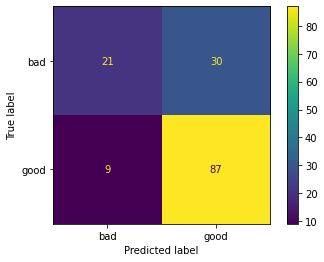

In [58]:
test_cm = metrics.plot_confusion_matrix(model, X_test, y_test)